In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("C:/Users/hp/Downloads/big_startup_secsees_dataset.csv/big_startup_secsees_dataset.csv")

In [3]:
print(data.head())
print(data.info())
print(data.describe())

                             permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list funding_total_usd  \
0                                              Media          10000000   
1  Application Platforms|Real Time|Social Network...            700000   
2                                  Apps|Games|Mobile           3406878   
3                                        Curated Web           200

In [4]:
print(data.isnull().sum())

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64


In [5]:
data["name"].fillna("anonymous", inplace=True)
data["category_list"].fillna("miscellaneous", inplace=True)
data["country_code"].fillna("ZOMBIE", inplace=True)
data["state_code"].fillna("unknown-state", inplace=True)
data["city"].fillna("unknown-city", inplace=True)
data["region"].fillna("unknown-region", inplace=True)
data["founded_at"].fillna("0000", inplace=True)
data["homepage_url"].fillna("Error-404", inplace=True)
data["name"].fillna("anonymous", inplace=True)
data["first_funding_at"].fillna("2011-07-20", inplace=True)

In [6]:
print(data.isnull().sum())

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64


In [7]:
data.groupby('status')['name'].nunique()

status
acquired      5549
closed        6234
ipo           1546
operating    52862
Name: name, dtype: int64

In [8]:
data.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(6)

country_code
USA       37489
ZOMBIE     6949
GBR        3684
CAN        1925
IND        1596
CHN        1543
Name: name, dtype: int64

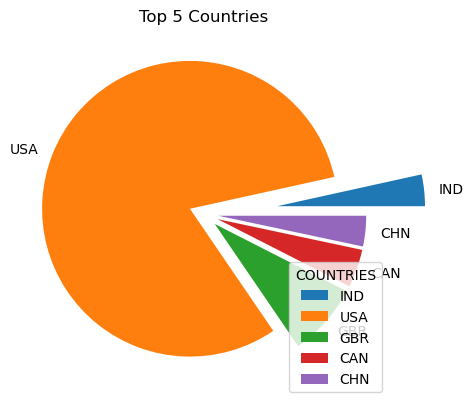

In [9]:
yarr = np.array([1596, 37489, 3684, 1925, 1543])

labelsarr = ['IND', 'USA', 'GBR', 'CAN', 'CHN']

explodearr = [0.5,0.1,0.1,0.1,0.1]

plt.pie(yarr, labels=labelsarr, explode=explodearr)

plt.legend( loc = "lower right" , title = "COUNTRIES")
plt.title("Top 5 Countries")

plt.show()

In [10]:
frequency1= data['category_list'].value_counts().head(11)
print(frequency1)

category_list
Software               3995
Biotechnology          3615
miscellaneous          3148
E-Commerce             1332
Mobile                 1177
Clean Technology       1133
Curated Web            1050
Hardware + Software     932
Health Care             930
Games                   862
Enterprise Software     845
Name: count, dtype: int64


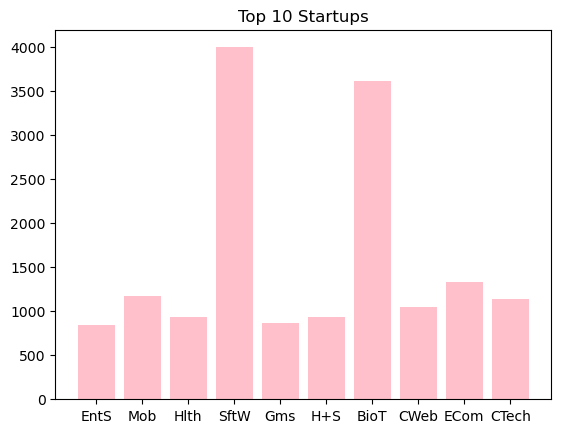

In [11]:
x = np.array([ 'EntS', 'Mob', 'Hlth', 'SftW', 'Gms', 'H+S', 'BioT', 'CWeb', 'ECom', 'CTech'])
y = np.array([845, 1177, 930, 3995, 862, 932, 3615, 1050, 1332, 1133])

plt.bar(x,y, color = 'pink', width= 0.8)
plt.title("Top 10 Startups")

plt.show()

In [12]:
data['first_funding_at'] =  pd.to_datetime(data['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')

In [13]:
data['first_funding_at'].mean()

Timestamp('2011-07-20 08:19:00.890529536')

In [14]:
data['last_funding_at'] =  pd.to_datetime(data['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')

In [15]:
data['diff_funding'] = data['last_funding_at'] - data['first_funding_at']

In [16]:
data['diff_funding'].describe()

count                          66365
mean     342 days 12:31:06.260830260
std      710 days 10:37:41.159654952
min              -124 days +00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                417 days 00:00:00
max              36994 days 00:00:00
Name: diff_funding, dtype: object

In [17]:
data['diff_funding_months'] = (data['last_funding_at'] - data['first_funding_at'])/np.timedelta64(1, 'm')

In [18]:
data['diff_funding_months'].describe()

count    6.636500e+04
mean     4.932311e+05
std      1.023038e+06
min     -1.785600e+05
25%      0.000000e+00
50%      0.000000e+00
75%      6.004800e+05
max      5.327136e+07
Name: diff_funding_months, dtype: float64

In [19]:
data['founded_at'] =  pd.to_datetime(data['founded_at'], format='%Y-%m-%d', errors = 'coerce')

In [20]:
data['diff_first_funding_months'] = (data['first_funding_at'] - data['founded_at'])/np.timedelta64(1, 'm')

In [21]:
data['diff_first_funding_months'].describe() 

count    5.114100e+04
mean     1.971909e+06
std      5.124541e+06
min     -4.759920e+07
25%      2.059200e+05
50%      7.430400e+05
75%      1.971360e+06
max      1.339963e+08
Name: diff_first_funding_months, dtype: float64

In [22]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'diff_funding', 'diff_funding_months',
       'diff_first_funding_months'],
      dtype='object')

In [23]:
data2 = data.copy()

In [24]:
data2 = data2.drop( columns=['homepage_url','permalink', 'name', 'state_code', 'region', 'city'])

In [25]:
label_encoders = {}
categorical_columns = ['category_list', 'status', 'country_code']
for columns in categorical_columns:
    label_encoders[columns] = LabelEncoder()
    data2[columns] = label_encoders[columns].fit_transform(data2[columns])

data2



,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,diff_funding,diff_funding_months,diff_first_funding_months
0,24912,10000000,3,55,1,NaT,2015-01-05,2015-01-05,0 days,0.0,NaN
1,4651,700000,3,130,2,2014-09-04,2014-03-01,2014-10-14,227 days,326880.0,-269280.0
2,5312,3406878,3,136,1,NaT,2014-01-30,2014-01-30,0 days,0.0,NaN
3,14525,2000000,3,23,1,2007-01-01,2008-03-19,2008-03-19,0 days,0.0,637920.0
4,26968,-,3,130,1,2010-01-01,2014-07-24,2014-07-24,0 days,0.0,2397600.0
...,...,...,...,...,...,...,...,...,...,...,...
66363,19354,1587301,3,23,1,NaT,2012-04-01,2012-04-01,0 days,0.0,NaN
66364,1995,114304,3,52,4,2012-05-13,2011-11-01,2014-03-01,851 days,1225440.0,-279360.0
66365,27296,-,3,136,1,2011-01-01,2014-08-01,2014-08-01,0 days,0.0,1883520.0
66366,13042,18192,3,130,1,2014-01-01,2015-01-01,2015-01-01,0 days,0.0,525600.0


In [26]:
data2.isnull().sum()

category_list                    0
funding_total_usd                0
status                           0
country_code                     0
funding_rounds                   0
founded_at                   15225
first_funding_at                 3
last_funding_at                  0
diff_funding                     3
diff_funding_months              3
diff_first_funding_months    15227
dtype: int64

In [27]:
data2["founded_at"].fillna("2000-01-01", inplace=True)
data2["first_funding_at"].fillna("2001-07-28", inplace=True)





In [28]:
data2['first_funding_at'] =  pd.to_datetime(data2['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')

In [29]:
data2['last_funding_at'] =  pd.to_datetime(data2['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')

In [30]:
data2['diff_funding'] = data2['last_funding_at'] - data2['first_funding_at']

In [31]:
data2['diff_funding_months'] = (data2['last_funding_at'] - data2['first_funding_at'])/np.timedelta64(1, 'm')

In [32]:
data2['founded_at'] =  pd.to_datetime(data2['founded_at'], format='%Y-%m-%d', errors = 'coerce')

In [33]:
data2['diff_first_funding_months'] = (data2['first_funding_at'] - data2['founded_at'])/np.timedelta64(1, 'm')

In [34]:
data2.isnull().sum()

category_list                0
funding_total_usd            0
status                       0
country_code                 0
funding_rounds               0
founded_at                   0
first_funding_at             0
last_funding_at              0
diff_funding                 0
diff_funding_months          0
diff_first_funding_months    0
dtype: int64

In [35]:
data2["diff_funding_months"].fillna("0.0", inplace=True)

In [36]:
data2.isnull().sum()

category_list                0
funding_total_usd            0
status                       0
country_code                 0
funding_rounds               0
founded_at                   0
first_funding_at             0
last_funding_at              0
diff_funding                 0
diff_funding_months          0
diff_first_funding_months    0
dtype: int64

In [37]:
data2

,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,diff_funding,diff_funding_months,diff_first_funding_months
0,24912,10000000,3,55,1,2000-01-01,2015-01-05,2015-01-05,0 days,0.0,7895520.0
1,4651,700000,3,130,2,2014-09-04,2014-03-01,2014-10-14,227 days,326880.0,-269280.0
2,5312,3406878,3,136,1,2000-01-01,2014-01-30,2014-01-30,0 days,0.0,7405920.0
3,14525,2000000,3,23,1,2007-01-01,2008-03-19,2008-03-19,0 days,0.0,637920.0
4,26968,-,3,130,1,2010-01-01,2014-07-24,2014-07-24,0 days,0.0,2397600.0
...,...,...,...,...,...,...,...,...,...,...,...
66363,19354,1587301,3,23,1,2000-01-01,2012-04-01,2012-04-01,0 days,0.0,6442560.0
66364,1995,114304,3,52,4,2012-05-13,2011-11-01,2014-03-01,851 days,1225440.0,-279360.0
66365,27296,-,3,136,1,2011-01-01,2014-08-01,2014-08-01,0 days,0.0,1883520.0
66366,13042,18192,3,130,1,2014-01-01,2015-01-01,2015-01-01,0 days,0.0,525600.0


In [38]:
data3 = data2.copy()

In [39]:
data3 = data3.drop(columns=['founded_at', 'first_funding_at','last_funding_at'])

In [40]:
data3

,category_list,funding_total_usd,status,country_code,funding_rounds,diff_funding,diff_funding_months,diff_first_funding_months
0,24912,10000000,3,55,1,0 days,0.0,7895520.0
1,4651,700000,3,130,2,227 days,326880.0,-269280.0
2,5312,3406878,3,136,1,0 days,0.0,7405920.0
3,14525,2000000,3,23,1,0 days,0.0,637920.0
4,26968,-,3,130,1,0 days,0.0,2397600.0
...,...,...,...,...,...,...,...,...
66363,19354,1587301,3,23,1,0 days,0.0,6442560.0
66364,1995,114304,3,52,4,851 days,1225440.0,-279360.0
66365,27296,-,3,136,1,0 days,0.0,1883520.0
66366,13042,18192,3,130,1,0 days,0.0,525600.0


In [41]:
data3.isnull().sum()

category_list                0
funding_total_usd            0
status                       0
country_code                 0
funding_rounds               0
diff_funding                 0
diff_funding_months          0
diff_first_funding_months    0
dtype: int64

In [42]:
data3.dtypes

category_list                          int32
funding_total_usd                     object
status                                 int32
country_code                           int32
funding_rounds                         int64
diff_funding                 timedelta64[ns]
diff_funding_months                  float64
diff_first_funding_months            float64
dtype: object

In [43]:
data3["funding_total_usd"].describe()

count     66368
unique    18896
top           -
freq      12785
Name: funding_total_usd, dtype: object

In [44]:
data3['funding_total_usd'].max()

'9999999'

In [45]:
data3['funding_total_usd'].min()

'-'

In [46]:
data3['funding_total_usd'] =data3['funding_total_usd'].replace('-', '0')

In [47]:
data3['funding_total_usd'].min()

'0'

In [48]:
data3['funding_total_usd'].dtype

dtype('O')

In [49]:
data3['funding_total_usd'] = pd.to_numeric(data3['funding_total_usd'])

In [50]:
data3['funding_total_usd'].dtype

dtype('float64')

In [51]:
data3['diff_funding_months'] = pd.to_numeric(data3['diff_funding_months'])

In [52]:
data3['diff_funding_months'].dtype

dtype('float64')

In [53]:
data3['diff_funding'] = pd.to_numeric(data3['diff_funding'])

In [54]:
data3.dtypes

category_list                  int32
funding_total_usd            float64
status                         int32
country_code                   int32
funding_rounds                 int64
diff_funding                   int64
diff_funding_months          float64
diff_first_funding_months    float64
dtype: object

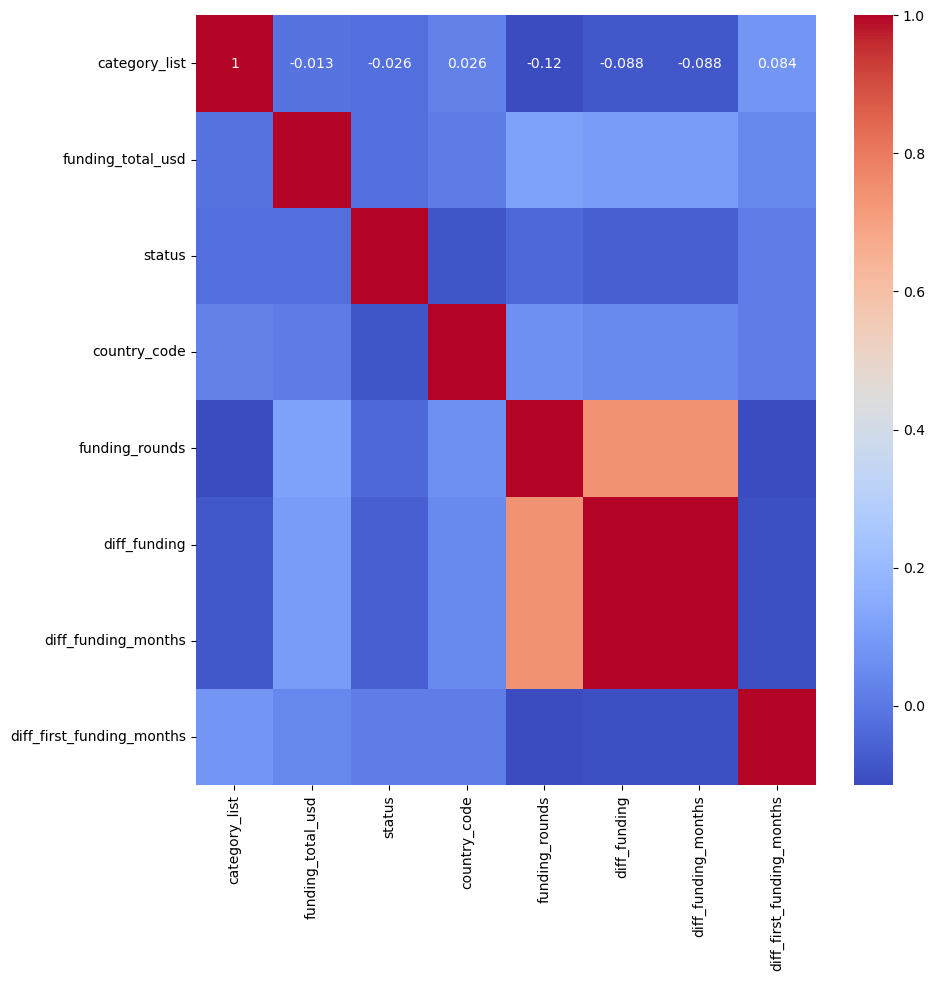

In [55]:
fig = plt.figure(figsize=(10,10))
correlation_matrix = data3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm')

plt.show()

In [56]:
data3

,category_list,funding_total_usd,status,country_code,funding_rounds,diff_funding,diff_funding_months,diff_first_funding_months
0,24912,10000000.0,3,55,1,0,0.0,7895520.0
1,4651,700000.0,3,130,2,19612800000000000,326880.0,-269280.0
2,5312,3406878.0,3,136,1,0,0.0,7405920.0
3,14525,2000000.0,3,23,1,0,0.0,637920.0
4,26968,0.0,3,130,1,0,0.0,2397600.0
...,...,...,...,...,...,...,...,...
66363,19354,1587301.0,3,23,1,0,0.0,6442560.0
66364,1995,114304.0,3,52,4,73526400000000000,1225440.0,-279360.0
66365,27296,0.0,3,136,1,0,0.0,1883520.0
66366,13042,18192.0,3,130,1,0,0.0,525600.0


In [57]:
column_to_move = data3.pop("status")

# insert column with insert(location, column_name, column_value)

data3.insert(7, "status", column_to_move)

In [58]:
data3

,category_list,funding_total_usd,country_code,funding_rounds,diff_funding,diff_funding_months,diff_first_funding_months,status
0,24912,10000000.0,55,1,0,0.0,7895520.0,3
1,4651,700000.0,130,2,19612800000000000,326880.0,-269280.0,3
2,5312,3406878.0,136,1,0,0.0,7405920.0,3
3,14525,2000000.0,23,1,0,0.0,637920.0,3
4,26968,0.0,130,1,0,0.0,2397600.0,3
...,...,...,...,...,...,...,...,...
66363,19354,1587301.0,23,1,0,0.0,6442560.0,3
66364,1995,114304.0,52,4,73526400000000000,1225440.0,-279360.0,3
66365,27296,0.0,136,1,0,0.0,1883520.0,3
66366,13042,18192.0,130,1,0,0.0,525600.0,3


In [59]:
data3["status"].info()
data3['status'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 66368 entries, 0 to 66367
Series name: status
Non-Null Count  Dtype
--------------  -----
66368 non-null  int32
dtypes: int32(1)
memory usage: 259.4 KB


count    66368.000000
mean         2.537880
std          0.968617
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: status, dtype: float64

In [60]:
frequencie= data3['status'].value_counts().head(4)
print(frequencie)

status
3    53034
1     6238
0     5549
2     1547
Name: count, dtype: int64


In [61]:
data3 = data3.replace({'status':2},0)
data3 = data3.replace({'status':1},0)
data3 = data3.replace({'status':3},1)


In [62]:
data3

,category_list,funding_total_usd,country_code,funding_rounds,diff_funding,diff_funding_months,diff_first_funding_months,status
0,24912,10000000.0,55,1,0,0.0,7895520.0,1
1,4651,700000.0,130,2,19612800000000000,326880.0,-269280.0,1
2,5312,3406878.0,136,1,0,0.0,7405920.0,1
3,14525,2000000.0,23,1,0,0.0,637920.0,1
4,26968,0.0,130,1,0,0.0,2397600.0,1
...,...,...,...,...,...,...,...,...
66363,19354,1587301.0,23,1,0,0.0,6442560.0,1
66364,1995,114304.0,52,4,73526400000000000,1225440.0,-279360.0,1
66365,27296,0.0,136,1,0,0.0,1883520.0,1
66366,13042,18192.0,130,1,0,0.0,525600.0,1


In [63]:
x = data3.iloc[:, :-1].values
y = data3.iloc[:, -1].values

In [64]:
x,y

(array([[ 2.491200e+04,  1.000000e+07,  5.500000e+01, ...,  0.000000e+00,
          0.000000e+00,  7.895520e+06],
        [ 4.651000e+03,  7.000000e+05,  1.300000e+02, ...,  1.961280e+16,
          3.268800e+05, -2.692800e+05],
        [ 5.312000e+03,  3.406878e+06,  1.360000e+02, ...,  0.000000e+00,
          0.000000e+00,  7.405920e+06],
        ...,
        [ 2.729600e+04,  0.000000e+00,  1.360000e+02, ...,  0.000000e+00,
          0.000000e+00,  1.883520e+06],
        [ 1.304200e+04,  1.819200e+04,  1.300000e+02, ...,  0.000000e+00,
          0.000000e+00,  5.256000e+05],
        [ 1.315100e+04,  1.485100e+04,  1.360000e+02, ...,  0.000000e+00,
          0.000000e+00,  7.231680e+06]]),
 array([1, 1, 1, ..., 1, 1, 1]))

In [65]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(x,y)
print(X_new)

[[1.000000e+07 5.500000e+01 1.000000e+00 0.000000e+00 0.000000e+00]
 [7.000000e+05 1.300000e+02 2.000000e+00 1.961280e+16 3.268800e+05]
 [3.406878e+06 1.360000e+02 1.000000e+00 0.000000e+00 0.000000e+00]
 ...
 [0.000000e+00 1.360000e+02 1.000000e+00 0.000000e+00 0.000000e+00]
 [1.819200e+04 1.300000e+02 1.000000e+00 0.000000e+00 0.000000e+00]
 [1.485100e+04 1.360000e+02 1.000000e+00 0.000000e+00 0.000000e+00]]


In [66]:
x

array([[ 2.491200e+04,  1.000000e+07,  5.500000e+01, ...,  0.000000e+00,
         0.000000e+00,  7.895520e+06],
       [ 4.651000e+03,  7.000000e+05,  1.300000e+02, ...,  1.961280e+16,
         3.268800e+05, -2.692800e+05],
       [ 5.312000e+03,  3.406878e+06,  1.360000e+02, ...,  0.000000e+00,
         0.000000e+00,  7.405920e+06],
       ...,
       [ 2.729600e+04,  0.000000e+00,  1.360000e+02, ...,  0.000000e+00,
         0.000000e+00,  1.883520e+06],
       [ 1.304200e+04,  1.819200e+04,  1.300000e+02, ...,  0.000000e+00,
         0.000000e+00,  5.256000e+05],
       [ 1.315100e+04,  1.485100e+04,  1.360000e+02, ...,  0.000000e+00,
         0.000000e+00,  7.231680e+06]])

In [67]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_new)
scaled_features

array([[-0.02909026, -1.15063625, -0.53852355, -0.48199025, -0.48199025],
       [-0.08409   ,  0.61566456,  0.19664041, -0.16274843, -0.16274843],
       [-0.06808166,  0.75696862, -0.53852355, -0.48199025, -0.48199025],
       ...,
       [-0.08822977,  0.75696862, -0.53852355, -0.48199025, -0.48199025],
       [-0.08812218,  0.61566456, -0.53852355, -0.48199025, -0.48199025],
       [-0.08814194,  0.75696862, -0.53852355, -0.48199025, -0.48199025]])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2,random_state=0)

classifiers = {
    'Logistic Regression' : LogisticRegression() ,
    'Decision Tree' : DecisionTreeClassifier() ,
    'Random Forest' : RandomForestClassifier() ,
    'Support Vector Machine' : SVC() ,
    'Naive Bayes' : GaussianNB(),
    'K-Nearest Neighbors' : KNeighborsClassifier()


}

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy:{accuracy*100:.2f}%")
    print(classification_report(y_test, y_pred))
    print(".........................................................................................................")



Confusion Matrix for Logistic Regression:
 [[   18  2629]
 [   14 10613]]
Logistic Regression Accuracy:80.09%
              precision    recall  f1-score   support

           0       0.56      0.01      0.01      2647
           1       0.80      1.00      0.89     10627

    accuracy                           0.80     13274
   macro avg       0.68      0.50      0.45     13274
weighted avg       0.75      0.80      0.71     13274

.........................................................................................................
Confusion Matrix for Decision Tree:
 [[ 477 2170]
 [1222 9405]]
Decision Tree Accuracy:74.45%
              precision    recall  f1-score   support

           0       0.28      0.18      0.22      2647
           1       0.81      0.89      0.85     10627

    accuracy                           0.74     13274
   macro avg       0.55      0.53      0.53     13274
weighted avg       0.71      0.74      0.72     13274

....................................

In [82]:
best_classifier = max(results, key=results.get)
print(f"Best Classifier:{best_classifier} with Accuracy: {results[best_classifier]:.4f}")


Best Classifier:Logistic Regression with Accuracy: 0.8009


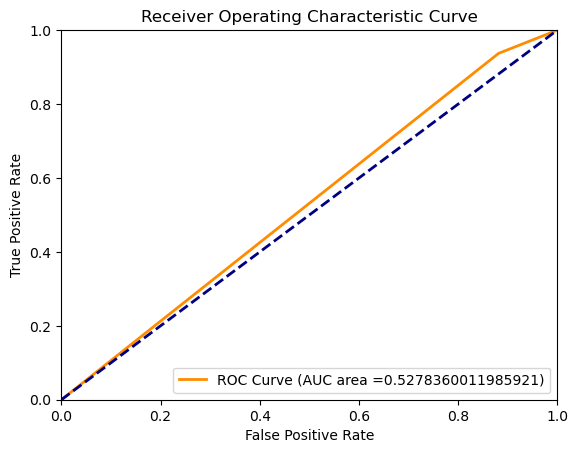

In [83]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr,color = 'darkorange' , lw=2, label= f'ROC Curve (AUC area ={roc_auc})')
plt.plot([0,1] , [0,1] , color ='navy' ,lw = 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

         
         
          

In [85]:
from sklearn.ensemble import AdaBoostClassifier
base_dt = DecisionTreeClassifier(max_depth=5, random_state= 42)
adaboost_clf = AdaBoostClassifier(base_estimator= base_dt, n_estimators= 50, random_state=42)


In [86]:
adaboost_clf.fit(X_train,y_train)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=42),
                   random_state=42)

In [87]:
y_pred = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy:{accuracy:.4f}")
print("Confusion Matrix:\n" , conf_matrix)

Accuracy:0.7926
Confusion Matrix:
 [[  138  2509]
 [  244 10383]]


In [88]:
adaboost_clf.feature_importances_

array([0.45035349, 0.1384488 , 0.08424442, 0.17682739, 0.1501259 ])

In [95]:
lis1 = data3.columns[:5]
lis1

Index(['category_list', 'funding_total_usd', 'country_code', 'funding_rounds',
       'diff_funding'],
      dtype='object')

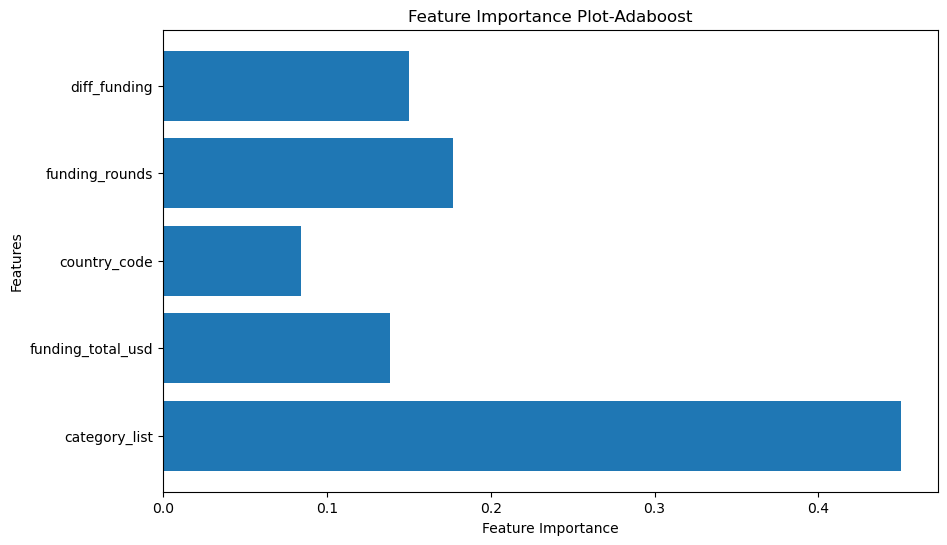

In [97]:
plt.figure(figsize=(10,6))
plt.barh(lis1, adaboost_clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot-Adaboost")
plt.show()